<a href="https://colab.research.google.com/github/farahenany/Dissertation/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [ ]:
customer_base = pd.read_csv("drive/MyDrive/Dissertation/Dissertation/customer_retail_bank/Supervised_data.csv")
print(customer_base)

        Numcust       TRB  Primary_cust  Digital_cust  CA_holders  \
0      0.070379 -0.243790      0.340697      0.252573   -0.270957   
1      0.177381 -0.199371      0.487501      0.381397   -0.270957   
2      0.070379 -0.243790      0.340697      0.252573   -0.270957   
3      0.070379 -0.243790      0.340697      0.252573   -0.270957   
4      0.070379 -0.243790      0.340697      0.252573   -0.270957   
...         ...       ...           ...           ...         ...   
55291 -0.143626 -0.322757     -0.246518     -0.262722   -0.058875   
55292 -0.304130 -0.396788     -0.246518     -0.262722   -0.217937   
55293  0.070379 -0.224048     -0.246518     -0.262722    0.153207   
55294 -0.143626 -0.322757     -0.246518     -0.262722   -0.058875   
55295 -0.036624 -0.273403     -0.246518     -0.262722    0.047166   

       Card_holders  Ins_holders  Inv_holders  Mort_holders  Primary  \
0         -0.235752     2.060290    -0.321304     -0.251197      2.0   
1         -0.235752     2.7

In [ ]:
customer_base= customer_base.drop(['TRB', 'Numcust'],axis=1)

This file contains the data used for the supervised learning. It is the same exactly as the other data used fro all methods , however, the target variable here which is revenue is not scaled.

The next bit of code is an implementation of the stratified split for the training and test dataset, however it does not work directly because the target variable is extremely skewed so conducting a startified slpit is not possible because the classes do not have a balanced number of observations and one of the classes is has one group so a transformation is need to be able to split the data using stratified sampling.

In [ ]:
# Splitting data into trainng and test
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=42)

for train_index, test_index in split.split(customer_base,customer_base['Revenue']):
    strat_train_set = customer_base.loc[train_index]
    strat_test_set = customer_base.loc[test_index]

ValueError: ignored

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

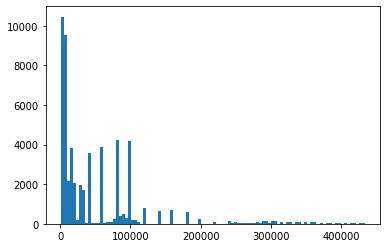

In [ ]:
  _=plt.hist(customer_base['Revenue'],bins=100) 

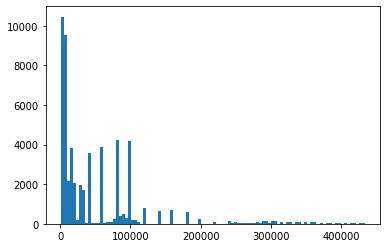

In [ ]:
_=plt.hist(np.ceil(customer_base['Revenue']),bins=100)

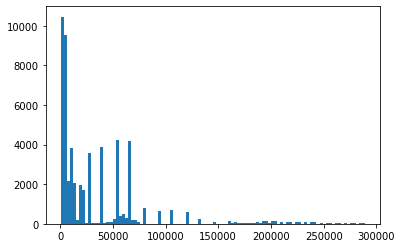

In [ ]:
_=plt.hist(np.ceil(customer_base['Revenue']/1.5), bins=100)

In [ ]:
customer_base["Revenue_category"]=np.ceil(customer_base["Revenue"]/1.5)
customer_base.head()




,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS,Revenue,Revenue_category
0,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,12000,8000.0
1,0.487501,0.381397,-0.270957,-0.235752,2.701543,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,15000,10000.0
2,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,12000,8000.0
3,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,12000,8000.0
4,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,12000,8000.0


In [ ]:
bins= [0.0, 50000.0, 100000.0, 150000.0, 200000.0,300000.0, 500000.0]
countval=np.histogram(customer_base["Revenue_category"], bins=bins)
print(countval)

(array([39567, 11717,  1724,   889,  1399,     0]), array([     0.,  50000., 100000., 150000., 200000., 300000., 500000.]))


In [ ]:
customer_base["Revenue_category"].where(customer_base["Revenue_category"] < 120000.0, 120000.0, inplace = True)
customer_base.head()

,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS,Revenue,Revenue_category
0,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,12000,8000.0
1,0.487501,0.381397,-0.270957,-0.235752,2.701543,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,15000,10000.0
2,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,12000,8000.0
3,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,12000,8000.0
4,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,12000,8000.0


Note the where statement. Where the condition is fulfilled, the number is replaced by itself. Where the condition is not fulfilled it is being replaced by 500000. We can check the number of entries in each category:

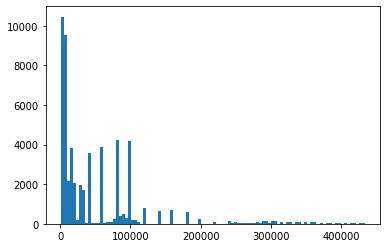

In [ ]:
_=plt.hist(np.ceil(customer_base['Revenue']),bins=100)

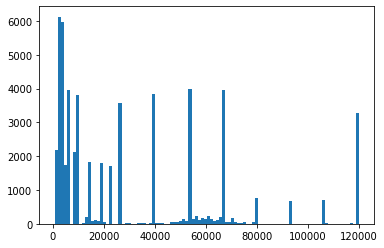

In [ ]:
_=plt.hist(np.ceil(customer_base['Revenue_category']),bins=100)

In [ ]:
customer_base['Revenue_category']

0         8000.0
1        10000.0
2         8000.0
3         8000.0
4         8000.0
          ...   
55291    26667.0
55292     6667.0
55293    53334.0
55294    26667.0
55295    40000.0
Name: Revenue_category, Length: 55296, dtype: float64

In [ ]:
customer_base['Revenue_category']=pd.cut(customer_base['Revenue_category'], bins= 5)

After this transformation to the target variable by discretizing it, we are now able to split the data into test and training sets


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

for train_index, test_index in split.split(customer_base,customer_base['Revenue_category']):
    strat_train_set = customer_base.loc[train_index]
    strat_test_set = customer_base.loc[test_index]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# This is just a comparison for me to see that they have similar distributions
print(customer_base['Revenue_category'].value_counts()/len(customer_base))
print(strat_test_set["Revenue_category"].value_counts()/len(strat_test_set))
# we must generate a new test set as the the category variable was not in the earlier one
train_set, test_set = train_test_split(customer_base, test_size= 0.3,random_state=42)
print(test_set["Revenue_category"].value_counts()/len(test_set))

(547.667, 24533.6]     0.576154
(48400.2, 72266.8]     0.184118
(24533.6, 48400.2]     0.138618
(96133.4, 120000.0]    0.072645
(72266.8, 96133.4]     0.028465
Name: Revenue_category, dtype: float64
(547.667, 24533.6]     0.576130
(48400.2, 72266.8]     0.184087
(24533.6, 48400.2]     0.138608
(96133.4, 120000.0]    0.072694
(72266.8, 96133.4]     0.028481
Name: Revenue_category, dtype: float64
(547.667, 24533.6]     0.574357
(48400.2, 72266.8]     0.182531
(24533.6, 48400.2]     0.140093
(96133.4, 120000.0]    0.075653
(72266.8, 96133.4]     0.027368
Name: Revenue_category, dtype: float64


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(("Revenue_category"),axis=1,inplace=True)

In [ ]:
# for set_ in (strat_train_set, strat_test_set):
    # set_.drop(("TRB"),axis=1,inplace=True)

KeyError: ignored

In [ ]:
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop(("Numcust"),axis=1,inplace=True)

In [ ]:
strat_train_set

,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS,Revenue
33998,-0.246518,-0.262722,-0.270957,-0.235752,-0.504723,-0.321304,-0.251197,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,3000
34243,-0.246518,-0.262722,0.047166,-0.235752,-0.504723,0.486349,-0.251197,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,3000
18532,0.487501,0.381397,-0.270957,-0.235752,2.701543,-0.321304,0.436188,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,100000
54610,-0.246518,-0.262722,0.047166,0.106958,1.419036,0.486349,0.161234,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,5.0,2.0,60000
940,0.487501,0.381397,0.259248,0.335431,2.701543,-0.321304,0.436188,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,-0.246518,-0.262722,-0.270957,0.106958,1.419036,-0.321304,0.161234,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,4.0,1.0,3000
15129,-0.246518,0.252573,0.153207,-0.235752,2.060290,0.755567,0.298711,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,7200
27574,-0.246518,0.252573,-0.270957,-0.235752,-0.504723,0.755567,0.298711,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,80000
31527,0.193894,-0.262722,-0.270957,0.106958,-0.504723,-0.321304,0.161234,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,5.0,3.0,9000


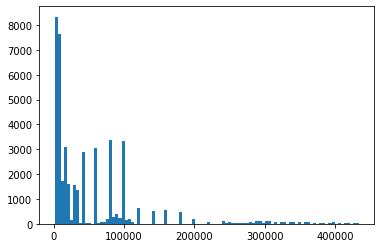

In [ ]:
_=plt.hist(strat_train_set['Revenue'],bins=100)

In [ ]:
strat_test_set

,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS,Revenue
30961,0.193894,-0.262722,0.047166,-0.235752,1.419036,-0.321304,-0.251197,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,9000
25691,-0.246518,0.381397,0.259248,-0.235752,2.701543,1.024784,0.436188,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,6.0,1.0,100000
21604,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,4.0,3.0,2.0,80000
40099,1.661931,-0.262722,1.107577,-0.235752,-0.504723,3.178525,-0.251197,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,3.0,2.0,91000
13583,0.487501,0.381397,-0.270957,0.335431,-0.504723,1.024784,0.436188,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41038,0.193894,-0.262722,-0.270957,0.106958,-0.504723,0.486349,0.161234,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,21000
45082,-0.246518,-0.262722,-0.058875,-0.235752,0.777783,0.217131,0.023757,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,3600
3871,0.487501,0.381397,-0.270957,0.335431,2.701543,1.024784,-0.251197,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,5.0,2.0,15000
5123,-0.246518,0.381397,-0.270957,0.335431,2.701543,1.024784,0.436188,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,5000


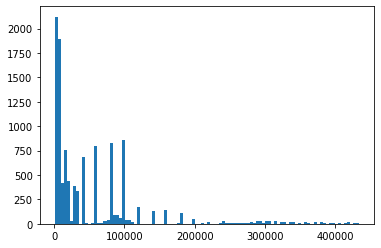

In [ ]:
_=plt.hist(strat_test_set['Revenue'],bins=100)

In [ ]:
Train_df=strat_train_set.drop("Revenue",axis=1)
Train_df_target=strat_train_set["Revenue"]

In [ ]:
Train_df_target

33998      3000
34243      3000
18532    100000
54610     60000
940       15000
          ...  
36317      3000
15129      7200
27574     80000
31527      9000
41060     77000
Name: Revenue, Length: 44236, dtype: int64

In [ ]:
Train_df

,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
33998,-0.246518,-0.262722,-0.270957,-0.235752,-0.504723,-0.321304,-0.251197,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0
34243,-0.246518,-0.262722,0.047166,-0.235752,-0.504723,0.486349,-0.251197,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0
18532,0.487501,0.381397,-0.270957,-0.235752,2.701543,-0.321304,0.436188,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0
54610,-0.246518,-0.262722,0.047166,0.106958,1.419036,0.486349,0.161234,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,5.0,2.0
940,0.487501,0.381397,0.259248,0.335431,2.701543,-0.321304,0.436188,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,-0.246518,-0.262722,-0.270957,0.106958,1.419036,-0.321304,0.161234,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,4.0,1.0
15129,-0.246518,0.252573,0.153207,-0.235752,2.060290,0.755567,0.298711,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0
27574,-0.246518,0.252573,-0.270957,-0.235752,-0.504723,0.755567,0.298711,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0
31527,0.193894,-0.262722,-0.270957,0.106958,-0.504723,-0.321304,0.161234,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,5.0,3.0


### Regression Models


In [ ]:
# importing necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# display scores function
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

 ### Splitting the data into 10 CV folds to use for all the models and dropping more variables
 
 ##### This step is essential in order to ensure that all the models are trained on all the same 10 folds and evaluated on the same validation set in order for the evaluation to be fair.

In [ ]:
from sklearn.model_selection import KFold
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
    # enumerate splits
outer_results = list()

for train_ix, validation_ix in cv_outer.split(Train_df):
#     print(train_ix, validation_ix)  ## this print line diplays the indexes of the 10 folds
#   split data
    X_train, X_test = Train_df.iloc[train_ix, :], Train_df.iloc[validation_ix, :]
    y_train, y_test = Train_df_target.iloc[train_ix], Train_df_target.iloc[validation_ix]

## Ordinary Least Square Model


In [ ]:
# define the linear regression model
lin_reg=LinearRegression()

In [ ]:
scores =cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error",cv=cv_outer)

linear_regression_scores = np.sqrt(-scores)
    
display_scores(linear_regression_scores)

Scores: [27137.54849505 28193.87301396 27791.28953433 27879.04229945
 27699.46077715 28100.53818309 28030.08366298 27243.92718122
 27927.74821685 27278.89823314]
Mean: 27728.240959721035
Standard deviation: 360.45268359980287


In [ ]:
# evaluate on validation set

lin_reg.fit(X_train,y_train)
final_predictions=lin_reg.predict(X_test)
print("R2 Score:",r2_score(y_test,final_predictions))
print("RMSE:",np.sqrt(mean_squared_error(y_test,final_predictions)))
print("MSE:",mean_squared_error(y_test,final_predictions))
print("MAE:",mean_absolute_error(y_test,final_predictions))

R2 Score: 0.8523826170652321
RMSE: 27832.78701974139
MSE: 774664033.2862848
MAE: 19895.170176362128


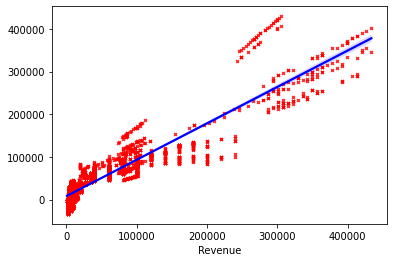

In [ ]:
import seaborn as sns
ax = sns.regplot(x=y_test, y=final_predictions,marker='x', color='red', scatter_kws={'s':8}, line_kws={'color':'blue'})

## Ridge Regression

In [ ]:
# specify ridge regression model
Ridge_reg=Ridge(alpha=22)
# grid search to find the best alpha for the model

param_grid  = [{'alpha':np.arange(0, 100,1)}]

grid_search = GridSearchCV(Ridge_reg, param_grid, cv=cv_outer,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(alpha=22),
             param_grid=[{'alpha': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

Ridge(alpha=5)

In [ ]:
# Cross Validation
scores =cross_val_score(Ridge_reg, X_train, y_train,scoring="neg_mean_squared_error",cv=cv_outer)

rr_rmse_scores = np.sqrt(-scores)

display_scores(rr_rmse_scores)

Scores: [27135.93841084 28196.2406161  27790.2199642  27879.85188531
 27698.37280306 28101.52337295 28031.7445344  27244.16284116
 27925.78581999 27279.02378074]
Mean: 27728.28640287473
Standard deviation: 361.13310483974533


In [ ]:
Ridge_reg.fit(X_train,y_train)
final_predictions_ridge=Ridge_reg.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,final_predictions_ridge)))
print("R2 Score:",r2_score(y_test,final_predictions_ridge))
print("MSE:",mean_squared_error(y_test,final_predictions_ridge))
print("MAE:",mean_absolute_error(y_test,final_predictions_ridge))


RMSE: 27833.219586560957
R2 Score: 0.852378028600699
MSE: 774688112.5537205
MAE: 19895.480467144473


In [ ]:
print(Ridge_reg.n_features_in_)

19


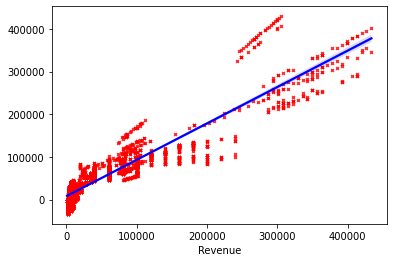

In [ ]:
ax = sns.regplot(x=y_test, y=final_predictions_ridge,marker='x', color='red', scatter_kws={'s':8}, line_kws={'color':'blue'})

In [ ]:
Ridge_reg.feature_names_in_

array(['Primary_cust', 'Digital_cust', 'CA_holders', 'Card_holders',
       'Ins_holders', 'Inv_holders', 'Mort_holders', 'Primary',
       'International', 'CA', 'Card', 'Insurance', 'Investment',
       'Mortgage', 'Digital', 'Proposition', 'Tenure', 'Age', 'NPS'],
      dtype=object)

In [ ]:
Ridge_reg.coef_

array([ 2.07757409e+04,  2.34611234e+04, -8.84503797e+02, -6.79197596e+03,
       -8.40538299e+03,  1.85655480e+03,  2.80680464e+03,  1.46410415e+03,
        7.92086965e+01,  3.61060645e+02,  1.70284229e+04,  4.00918115e+03,
       -1.87821818e+04, -6.21493319e+03,  7.63922228e+02,  1.05909079e+04,
        3.85189648e+04, -6.75622088e+01,  1.09553254e+01,  1.04037285e+02])

In [ ]:
Ridge_reg.intercept_

-53752.506657332204

In [ ]:
final_predictions

array([ 60243.90190695, 105299.57013903,  97955.5048849 , ...,
       105423.51287253,  53342.5716681 ,    977.50932216])

## Random Forest Model

In [ ]:
forest_reg=RandomForestRegressor()

# grid search to find the best parameters for the model, experimented  bootstapping
#but it took so much time and was not chosen by grid search to yield better results so it was removed from grid search

param_grid  = [{'n_estimators': [3, 10, 30,40,50, 60,70, 80, 90, 100],'max_features':[2, 4, 6, 8,10],
                'min_samples_split' :[20], 'bootstrap':[True],'min_impurity_decrease':[.2] ,'max_depth':[1,3,5,7,8], 
                'min_samples_split': [100], 'min_samples_leaf': [10],'random_state' :[42]}]


grid_search = GridSearchCV(forest_reg, param_grid, cv=cv_outer,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True], 'max_depth': [1, 3, 5, 7, 8],
                          'max_features': [2, 4, 6, 8, 10],
                          'min_impurity_decrease': [0.2],
                          'min_samples_leaf': [10], 'min_samples_split': [100],
                          'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90,
                                           100],
                          'random_state': [42]}],
             scoring='neg_mean_squared_error')

In [ ]:
random_forest_best=grid_search.best_estimator_


In [ ]:
random_forest_best


RandomForestRegressor(max_depth=8, max_features=10, min_impurity_decrease=0.2,
                      min_samples_leaf=10, min_samples_split=100,
                      n_estimators=50, random_state=42)

In [ ]:
# the one that took 30 minutes
RandomForestRegressor(max_depth=8, max_features=10, min_impurity_decrease=0.2,
                      min_samples_leaf=10, min_samples_split=100,
                      random_state=42)

RandomForestRegressor(max_depth=8, max_features=10, min_impurity_decrease=0.2,
                      min_samples_leaf=10, min_samples_split=100,
                      random_state=42)

In [ ]:
RandomForestRegressor(max_depth=10, max_features=10, min_samples_split=25,
                      random_state=42)

RandomForestRegressor(max_depth=10, max_features=10, min_samples_split=25,
                      random_state=42)

In [ ]:
random_forest_best.feature_importances_

array([1.63757622e-01, 4.43213476e-01, 1.39452972e-02, 1.38543765e-01,
       1.22284924e-02, 7.55377658e-04, 5.57098617e-03, 2.74876602e-02,
       2.05578854e-02, 1.50079258e-06, 4.18938310e-05, 1.69433688e-05,
       3.16296970e-05, 2.68666763e-04, 1.78450456e-04, 2.07442372e-03,
       1.71308470e-01, 2.92891910e-06, 4.16378217e-06, 1.03663756e-05])

In [ ]:
random_forest_best.n_features_in_

19

In [ ]:
random_forest_best.n_outputs_

1

In [ ]:
random_forest_best.feature_names_in_

array(['Primary_cust', 'Digital_cust', 'CA_holders', 'Card_holders',
       'Ins_holders', 'Inv_holders', 'Mort_holders', 'Primary',
       'International', 'CA', 'Card', 'Insurance', 'Investment',
       'Mortgage', 'Digital', 'Proposition', 'Tenure', 'Age', 'NPS'],
      dtype=object)

In [ ]:
random_forest_best.base_estimator_

DecisionTreeRegressor()

In [ ]:
random_forest_best.estimators_

[DecisionTreeRegressor(max_depth=8, max_features=10, min_impurity_decrease=0.2,
                       min_samples_leaf=10, min_samples_split=100,
                       random_state=1608637542),
 DecisionTreeRegressor(max_depth=8, max_features=10, min_impurity_decrease=0.2,
                       min_samples_leaf=10, min_samples_split=100,
                       random_state=1273642419),
 DecisionTreeRegressor(max_depth=8, max_features=10, min_impurity_decrease=0.2,
                       min_samples_leaf=10, min_samples_split=100,
                       random_state=1935803228),
 DecisionTreeRegressor(max_depth=8, max_features=10, min_impurity_decrease=0.2,
                       min_samples_leaf=10, min_samples_split=100,
                       random_state=787846414),
 DecisionTreeRegressor(max_depth=8, max_features=10, min_impurity_decrease=0.2,
                       min_samples_leaf=10, min_samples_split=100,
                       random_state=996406378),
 DecisionTreeRegressor

In [ ]:
#Cross Validation
scores=cross_val_score(forest_reg, X_train, y_train.values.ravel(),scoring="neg_mean_squared_error",cv=cv_outer)
forest_rmse_scores=np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [434.29780985 599.56034369 689.47599608 445.91542662 434.49500812
 620.48215283 515.68005499 649.59948242 618.64177747 479.04523859]
Mean: 548.7193290676774
Standard deviation: 92.34029429865242


In [ ]:
# evaluate on validation set
forest_reg.fit(X_train,y_train.values.ravel())
final_predictions=forest_reg.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test.values.ravel(),final_predictions)))
print("R2 Score:",r2_score(y_test.values.ravel(),final_predictions))
print("MSE:",mean_squared_error(y_test.values.ravel(),final_predictions))
print("MAE:",mean_absolute_error(y_test.values.ravel(),final_predictions))

RMSE: 533.9585331516676
R2 Score: 0.9999456700667355
MSE: 285111.71512548043
MAE: 32.84964955912277


In [ ]:
 import numpy as np
# >>> a = np.arange(127*127).reshape(127, 127)
np.set_printoptions(edgeitems=127)

In [ ]:
confusion_matrix(y_test.values.ravel(),final_predictions)

array([[ 14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test.values.ravel(),final_predictions)

0.9785213655889667

### Evaluation on Test Set for Random Forest

In [ ]:
Test_df=strat_test_set.drop("Revenue",axis=1)
Test_df_target=strat_test_set["Revenue"]

In [ ]:
Test_df

,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
30961,0.193894,-0.262722,0.047166,-0.235752,1.419036,-0.321304,-0.251197,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0
25691,-0.246518,0.381397,0.259248,-0.235752,2.701543,1.024784,0.436188,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,6.0,1.0
21604,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,4.0,3.0,2.0
40099,1.661931,-0.262722,1.107577,-0.235752,-0.504723,3.178525,-0.251197,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,3.0,2.0
13583,0.487501,0.381397,-0.270957,0.335431,-0.504723,1.024784,0.436188,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41038,0.193894,-0.262722,-0.270957,0.106958,-0.504723,0.486349,0.161234,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0
45082,-0.246518,-0.262722,-0.058875,-0.235752,0.777783,0.217131,0.023757,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0
3871,0.487501,0.381397,-0.270957,0.335431,2.701543,1.024784,-0.251197,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,5.0,2.0
5123,-0.246518,0.381397,-0.270957,0.335431,2.701543,1.024784,0.436188,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0


In [ ]:
final_predictions=random_forest_best.predict(Test_df)
print("RMSE:",np.sqrt(mean_squared_error(Test_df_target,final_predictions)))
print("MSE:",mean_squared_error(Test_df_target,final_predictions))
print("R2 Score:",r2_score(Test_df_target,final_predictions))
print("MAE:",mean_absolute_error(Test_df_target,final_predictions))

RMSE: 2494.790131598346
MSE: 6223977.800720492
R2 Score: 0.9987887098075272
MAE: 1048.0970287775856


## evaluate Ridge regression on test set


In [ ]:
final_predictions_ridge=Ridge_reg.predict(Test_df)
print("RMSE:",np.sqrt(mean_squared_error(Test_df_target,final_predictions_ridge)))
print("MSE:",mean_squared_error(Test_df_target,final_predictions_ridge))
print("R2 Score:",r2_score(Test_df_target,final_predictions_ridge))
print("MAE:",mean_absolute_error(Test_df_target,final_predictions_ridge))

RMSE: 27715.69329909654
MSE: 768159655.0495847
R2 Score: 0.8505032816301021
MAE: 19837.094746871386


## evaluate linear regression on test set

In [ ]:
final_predictions_ols=lin_reg.predict(Test_df)
print("RMSE:",np.sqrt(mean_squared_error(Test_df_target,final_predictions_ridge)))
print("MSE:",mean_squared_error(Test_df_target,final_predictions_ols))
print("R2 Score:",r2_score(Test_df_target,final_predictions_ols))
print("MAE:",mean_absolute_error(Test_df_target,final_predictions_ols))

RMSE: 27715.69329909654
MSE: 768163259.3934551
R2 Score: 0.8505025801644928
MAE: 19837.425943935075
